# <font color='brown'>Machine-Learning-Cook</font>

# 练习 3-2：比特币价格预测

## 练习介绍

![](http://i1.fuimg.com/649601/9c1058588dd73666.png)

> 比特币（英语：Bitcoin，缩写：BTC）被部分观点认为是一种去中心化，非普遍全球可支付的电子加密货币，而多数国家则认为比特币属于虚拟商品，并非货币。比特币由中本聪（化名）于 2009 年 1 月 3 日，基于无国界的对等网络，用共识主动性开源软件发明创立。自比特币出现至今为止，比特币一直是目前法币市场总值最高的加密货币。([维基百科](https://zh.wikipedia.org/wiki/%E6%AF%94%E7%89%B9%E5%B8%81))

一段时间以来，比特币的价值饱受质疑。有人认为是严重的「泡沫」，也有人认为是物有所值。但无论哪一种观点，我们都见证了比特币暴涨暴跌。本次练习收集到了 `2010-2018` 年比特币历史数据。其中包含交易价格、区块数量、交易费率等信息。我们将尝试使用多项式回归和岭回归方法来预测比特币价格变化趋势。

## 练习知识点

- 使用 Pandas 数据处理
- 使用 Matplotlib 绘图
- 使用 scikit-learn 训练多项式回归预测模型

---

## 练习内容

### 数据准备

首先，需要导入比特币历史数据集，并预览数据集前 5 行。数据集名称为 `test-2-bitcoin.csv`。

**<font color='red'>练习</font>**：使用 Pandas 加载数据集 CSV 文件，并预览前 `5` 行数据。

In [2]:
import pandas as pd

### 代码开始 ### (≈ 2 行代码)
df = pd.read_csv("test-2-bitcoin.csv")
df.head()
### 代码结束 ###

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date</th>
      <th>btc_market_price</th>
      <th>btc_total_bitcoins</th>
      <th>btc_market_cap</th>
      <th>btc_trade_volume</th>
      <th>btc_blocks_size</th>
      <th>btc_avg_block_size</th>
      <th>btc_n_orphaned_blocks</th>
      <th>btc_n_transactions_per_block</th>
      <th>btc_median_confirmation_time</th>
      <th>...</th>
      <th>btc_cost_per_transaction_percent</th>
      <th>btc_cost_per_transaction</th>
      <th>btc_n_unique_addresses</th>
      <th>btc_n_transactions</th>
      <th>btc_n_transactions_total</th>
      <th>btc_n_transactions_excluding_popular</th>
      <th>btc_n_transactions_excluding_chains_longer_than_100</th>
      <th>btc_output_volume</th>
      <th>btc_estimated_transaction_volume</th>
      <th>btc_estimated_transaction_volume_usd</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2010-02-23 00:00:00</td>
      <td>0.0</td>
      <td>2110700.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.000216</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>25100.000000</td>
      <td>0.0</td>
      <td>252.0</td>
      <td>252.0</td>
      <td>42613.0</td>
      <td>252.0</td>
      <td>252.0</td>
      <td>12600.0</td>
      <td>50.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2010-02-24 00:00:00</td>
      <td>0.0</td>
      <td>2120200.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.000282</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>179.245283</td>
      <td>0.0</td>
      <td>195.0</td>
      <td>196.0</td>
      <td>42809.0</td>
      <td>196.0</td>
      <td>196.0</td>
      <td>14800.0</td>
      <td>5300.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2010-02-25 00:00:00</td>
      <td>0.0</td>
      <td>2127600.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.000227</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>1057.142857</td>
      <td>0.0</td>
      <td>150.0</td>
      <td>150.0</td>
      <td>42959.0</td>
      <td>150.0</td>
      <td>150.0</td>
      <td>8100.0</td>
      <td>700.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2010-02-26 00:00:00</td>
      <td>0.0</td>
      <td>2136100.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.000319</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>64.582059</td>
      <td>0.0</td>
      <td>176.0</td>
      <td>176.0</td>
      <td>43135.0</td>
      <td>176.0</td>
      <td>176.0</td>
      <td>29349.0</td>
      <td>13162.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2010-02-27 00:00:00</td>
      <td>0.0</td>
      <td>2144750.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.000223</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>1922.222222</td>
      <td>0.0</td>
      <td>176.0</td>
      <td>176.0</td>
      <td>43311.0</td>
      <td>176.0</td>
      <td>176.0</td>
      <td>9101.0</td>
      <td>450.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

可以看到，原数据集中包含的数据较多，本次挑战中只使用其中的 3 列，分布是：**比特币市场价格**、**比特币总量**、**比特币交易费用**。它们对应的列名依次为：`btc_market_price`，`btc_total_bitcoins`，`btc_transaction_fees`。

---

**<font color='red'>练习</font>**：分离出仅包含 `btc_market_price`，`btc_total_bitcoins`，`btc_transaction_fees` 列的 DataFrame，并定义为变量 `data`。

In [3]:
"""从原数据集中分离出需要的数据集（DataFrame）
"""

### 代码开始 ### (≈ 1 行代码)
data = df[['btc_market_price','btc_total_bitcoins','btc_transaction_fees']]
### 代码结束 ###

**运行测试：**

In [4]:
data.head()

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0
1,0.0,2120200.0,0.0
2,0.0,2127600.0,0.0
3,0.0,2136100.0,0.0
4,0.0,2144750.0,0.0


**期望输出：**

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>btc_market_price</th>
      <th>btc_total_bitcoins</th>
      <th>btc_transaction_fees</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.0</td>
      <td>2110700.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>2120200.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>2127600.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>2136100.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.0</td>
      <td>2144750.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>

下面，我们将 3 列数据，分别绘制在横向排列的 3 张子图中。

---

**<font color='red'>练习</font>**：分别绘制 `data` 数据集 3 列数据的线形图，并以横向子图排列。

**<font color='brown'>要求</font>**：需设置各图横纵轴名称，横轴统一为 `time`，纵轴为各自列名称。

**<font color='green'>提示</font>**：使用 `set_xlabel()` 设置横轴名称。

Text(0,0.5,'btc_transaction_fees')

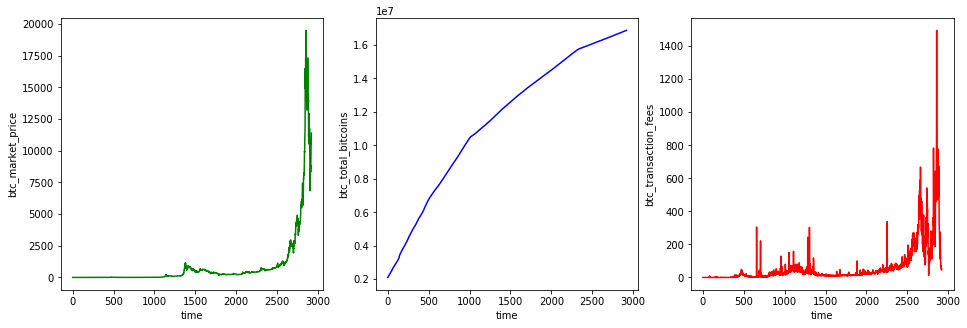

In [6]:
"""绘制数据图像
"""

%matplotlib inline
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16,5))


### 代码开始 ### (≈ 9 行代码)
axes[0].plot(data['btc_market_price'],'green')
axes[0].set_xlabel('time')
axes[0].set_ylabel('btc_market_price')
axes[1].plot(data['btc_total_bitcoins'],'blue')
axes[1].set_xlabel('time')
axes[1].set_ylabel('btc_total_bitcoins')
axes[2].plot(data['btc_transaction_fees'],'red')
axes[2].set_xlabel('time')
axes[2].set_ylabel('btc_transaction_fees')
### 代码结束 ###

**期望输出（可忽略颜色）：**

<img width="600px" src="http://i1.fuimg.com/649601/ec840421196bb27e.png"></img>

本次练习中，数据集的特征（features）是比特币总量和比特币交易费用，而目标值为比特币市场价格。所以，下面将数据集拆分为训练集和测试集。其中，训练集占 70%，而测试集占 30%。


---

**<font color='red'>练习</font>**：划分 `data` 数据集，使得训练集占 `70%`，而测试集占 `30%`。

**<font color='brown'>要求</font>**：训练集特征、训练集目标、测试集特征、测试集目标分别定义为 `train_x`, `train_y`, `test_x`, `test_y`，并作为 `split_dataset()` 函数返回值。

In [7]:
"""划分数据集函数
"""

def split_dataset():
    """
    参数:
    无

    返回:
    train_x, train_y, test_x, test_y -- 训练集特征、训练集目标、测试集特征、测试集目标
    """
    
    ### 代码开始 ### (≈ 6 行代码)
    train_data = data[:int(len(data)*0.7)] 
    test_data = data[int(len(data)*0.7):]
    
    train_x=train_data[['btc_total_bitcoins','btc_transaction_fees']]
    train_y=train_data[['btc_market_price']]
    
    test_x=test_data[['btc_total_bitcoins','btc_transaction_fees']]
    test_y=test_data[['btc_market_price']]
    ### 代码结束 ###
    
    return train_x, train_y, test_x, test_y

**运行测试：**

In [8]:
len(split_dataset()[0]), len(split_dataset()[1]), len(split_dataset()[2]), len(split_dataset()[3]), split_dataset()[0].shape, split_dataset()[1].shape, split_dataset()[2].shape, split_dataset()[3].shape

(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))

**期望输出：**

<div align="center">**`(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))`**</div>

### 3 次多项式回归预测

划分完训练数据和测试数据之后，就可以构建多项式回归预测模型。挑战要求使用 scikit-learn 完成。

In [9]:
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 加载数据
train_x = split_dataset()[0]
train_y = split_dataset()[1]
test_x = split_dataset()[2]
test_y = split_dataset()[3]

---

**<font color='red'>练习</font>**：构建 3 次多项式回归预测模型

要求：使用 scikit-learn 构建 3 次多项式回归预测模型，并计算预测结果的 MAE 评价指标，同时作为 poly3() 函数返回值。

In [12]:
"""3 次多项式回归预测模型
"""

def poly3():
    
    """
    参数:
    无

    返回:
    mae -- 预测结果的 MAE 评价指标
    """
    
    ### 代码开始 ### (≈ 7 行代码)
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    poly_train_x = poly_features.fit_transform(train_x)
    poly_test_x = poly_features.fit_transform(test_x)
    
    model = LinearRegression()# 定义线性回归模型
    model.fit(poly_train_x, train_y)# 训练
    # 得到模型拟合参数
    # model.intercept_, model.coef_
    pred_y = model.predict(poly_test_x) # 预测结果
    mae = mean_absolute_error(test_y, pred_y)
    
    ### 代码结束 ###
    
    return mae

**运行测试：**

In [13]:
poly3()

1955.8027673981337

**期望输出：**

<div align="center">**`1955.8027790596564`**</div>

### N 次多项式回归预测绘图

接下来，针对不同的多项式次数，计算相应的 MSE 评价指标数值并绘图。

---

**<font color='red'>练习</font>**：计算 `1,2,...,10` 次多项式回归预测结果的 `MSE` 评价指标

**<font color='brown'>要求</font>**：使用 scikit-learn 构建 N 次多项式回归预测模型，并计算 `1-10` 次多项式预测结果的 MSE 评价指标，同时作为函数 `poly_plot(N)` 的返回值。

In [17]:
"""N 次多项式回归预测模型
"""

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def poly_plot(N):
 
    """
    参数:
    N -- 标量, 多项式次数

    返回:
    mse -- N 次多项式预测结果的 MSE 评价指标列表
    """
    
    m = 1
    mse = []
    
    m_max = N # 设定最高次数
    
    ### 代码开始 ### (≈ 6 行代码)
    while m <= m_max:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(train_x, train_y) # 训练模型
        pre_y = model.predict(test_x) # 测试模型
        mse.append(mean_squared_error(test_y, pre_y)) # 计算 MSE
        m += 1 
    
    ### 代码结束 ###
    
    return mse

**运行测试：**

In [18]:
poly_plot(10)[:10:3]

[24171680.63629423, 23772243.042621814, 907429415.7150288, 3704437263.907734]

**期望输出（结果可能会稍有出入）：**

<div align="center">**`[24171680.63629423, 23772159.453013, 919854753.0234015, 3708858661.222856]`**</div>

---

**<font color='red'>练习</font>**：将 `MSE` 评价指标绘制成线型图

**<font color='brown'>要求</font>**：将 `poly_plot(10)` 返回的 `MSE` 列表绘制成组合图（线形图+散点图）。其中，线型图为红色。

Text(0,0.5,'MSE')

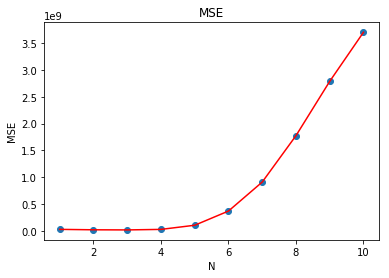

In [24]:
mse = poly_plot(10)

### 代码开始 ### (≈ 2 行代码)
plt.scatter([i for i in range(1,11)],mse)
plt.plot([i for i in range(1,11)], mse, "red")
# plt.plot(mse, "red")
### 代码结束 ###

plt.title("MSE")
plt.xlabel("N")
plt.ylabel("MSE")

**期望输出：**

![](http://i1.fuimg.com/649601/b141489cc9051f45.png)

---